In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_excel('Concrete_Data.xls')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [4]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

In [5]:
df.shape

(1030, 9)

In [6]:
#No null Values
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [7]:
df.isnull().values.any()

False

### Outliers are mainly found in columns Age

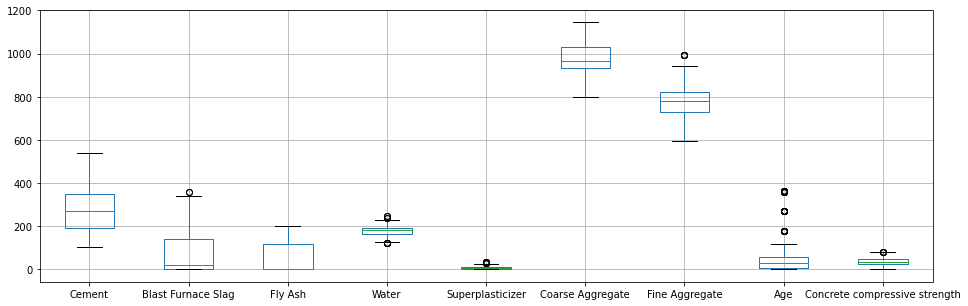

In [8]:
plt.figure(figsize=(16,5))
df.boxplot()
print()

In [9]:
df[['Water','Age']].describe()

,Water,Age
count,1030.000000,1030.000000
mean,181.566359,45.662136
std,21.355567,63.169912
min,121.750000,1.000000
25%,164.900000,7.000000
50%,185.000000,28.000000
75%,192.000000,56.000000
max,247.000000,365.000000


### Removing Outliers in Age using IQR

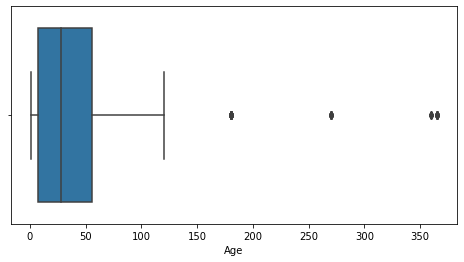

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.show()

In [11]:
Q1 = df['Age'].quantile(.25)
Q3 = df['Age'].quantile(.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[df['Age'] >= lower] 
df = df[df['Age'] <= upper]

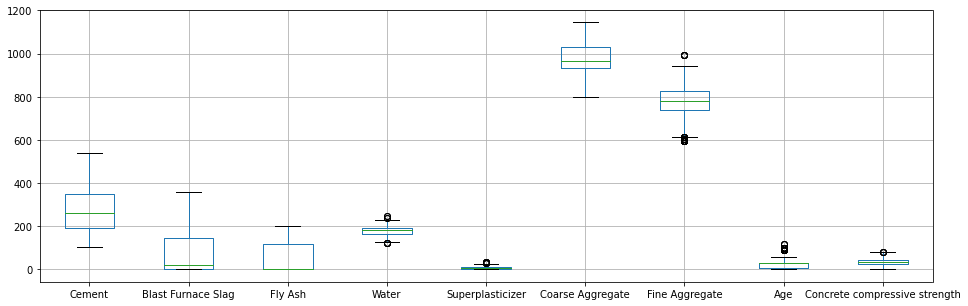

In [12]:
plt.figure(figsize=(16,5))
df.boxplot()
print()

In [13]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,278.074871,74.775747,57.479660,179.790268,6.580026,972.969464,777.688414,32.514933,35.310862
std,104.057055,86.747497,64.460922,20.215829,5.947296,78.711589,76.737640,28.616384,16.877112
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.770000,0.000000,931.250000,740.150000,7.000000,22.938867
50%,261.000000,22.000000,0.000000,182.500000,7.000000,968.000000,780.090000,28.000000,33.605060
75%,350.000000,145.000000,118.310000,192.000000,10.400000,1030.500000,825.000000,28.000000,45.532995
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,120.000000,82.599225


In [14]:
df.shape

(971, 9)

### Duplicated Values

In [15]:
print(df.duplicated().sum()) # 25 duplicate values 

25


In [16]:
df = df.drop_duplicates() # Values have been removed

### Correlations

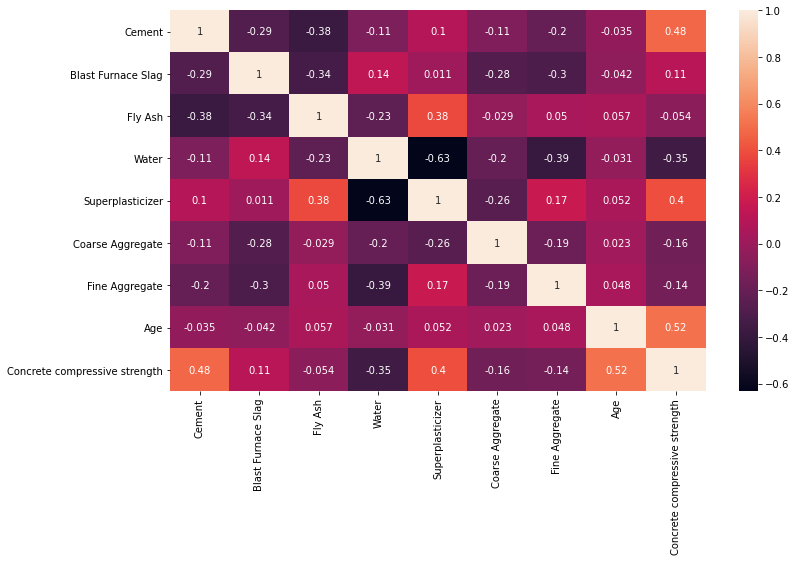

In [17]:
# Correlation between columns
plt.figure(figsize=(12,7))
correlation = df.corr()
sns.heatmap(correlation, annot = True);

In [18]:
correlations = df.corr()['Concrete compressive strength'].drop('Concrete compressive strength')
correlations.sort_values()

Water                -0.354210
Coarse Aggregate     -0.161573
Fine Aggregate       -0.144116
Fly Ash              -0.053505
Blast Furnace Slag    0.111964
Superplasticizer      0.400700
Cement                0.481138
Age                   0.515217
Name: Concrete compressive strength, dtype: float64

### Clustering

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [20]:
X = np.array(df.drop('Concrete compressive strength',1))
X

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 266. ,  114. ,    0. , ...,  932. ,  670. ,   90. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

#### Método de Elbow para descobrir o nº de Clusters

In [21]:
## O NÚMERO MÁXIMO DE POSSÍVEIS CLUSTERS É N. A QUANTIDADE DE EXPERIÊNCIAS
K = range(1,10)

In [22]:
# k means determine k
distortions = []

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

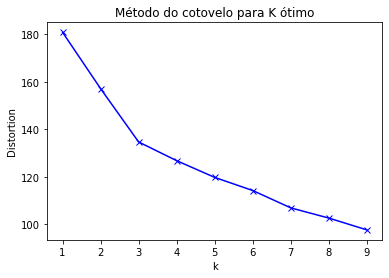

[180.8914676497195,
 157.1737396677596,
 134.7207430309038,
 126.84996214371502,
 119.81438235561342,
 114.28379278019393,
 106.98496258702053,
 102.69876470360579,
 97.72006437547303]

In [23]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Método do cotovelo para K ótimo')
plt.show()

distortions

> O melhor nº de K = 3

#### K-Means

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit_predict(X)

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
kmeans.labels_

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Comparando os valores existentes com as classes criadas

In [26]:
df['Classes'] = kmeans.labels_
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Classes
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,1
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847,2
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770,1
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291,2
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,2
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,1
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,2
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,2


In [27]:
df['Classes'].value_counts()

0    328
2    322
1    296
Name: Classes, dtype: int64

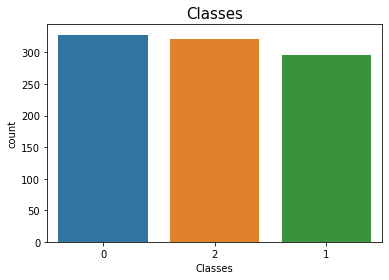

In [28]:
plt.title('Classes', fontsize = 15)
sns.countplot(df['Classes'], order = df['Classes'].value_counts().index)
plt.show()

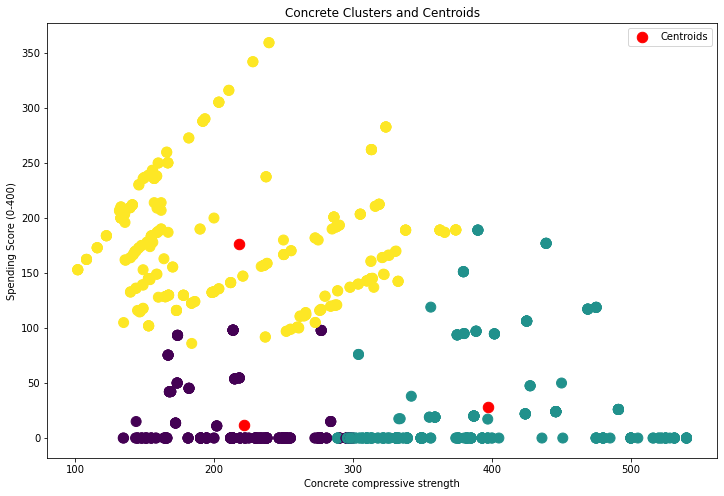

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 110, c = 'red', label = 'Centroids')
plt.title('Concrete Clusters and Centroids')
plt.legend()
plt.ylabel('Spending Score (0-400)') , plt.xlabel('Concrete compressive strength')
plt.show()

> A partir do número de três clusters as distâncias dos erros quadráticos praticamente se estabiliza, formando-se 3 grupos.


### Prevendo os dados

In [30]:
prediction = kmeans.labels_
prediction[80]

1

#### Prever qual classe pertencerá determinado concreto se dermos as seguintes condições

In [31]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Classes
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,1
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847,2
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770,1
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291,2


In [32]:
# Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate, Age

test = np.array([[148.5, 116.0, 115.1, 196.0, 2.5, 932.0, 761.5, 22]])

In [33]:
kmeans.predict(test) #Prevê qual classe pertencerá

array([2])